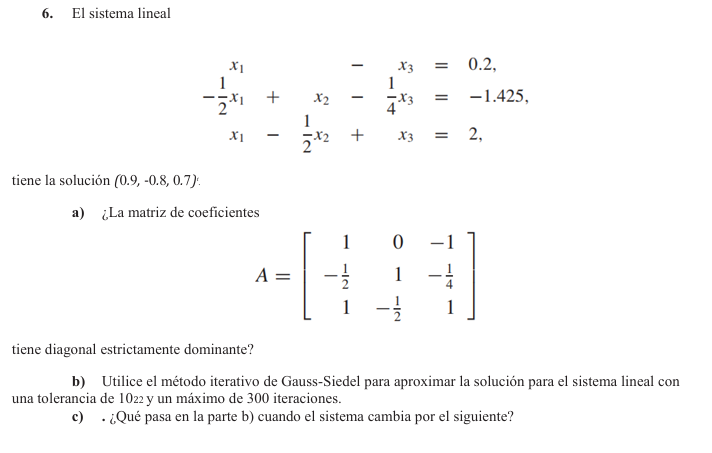

In [1]:
import numpy as np

def es_dominante_estricta(A):
    n = A.shape[0]
    for i in range(n):
        diagonal = abs(A[i, i])
        suma_fuera_diag = sum(abs(A[i, j]) for j in range(n) if j != i)
        print(f"Fila {i+1}: |a_ii| = {diagonal}, suma = {suma_fuera_diag}")
        if diagonal <= suma_fuera_diag:
            return False
    return True

A = np.array([
    [1, 0, -1],
    [-0.5, 1, -0.25],
    [1, -0.5, 1]
])

print("\n¿Es estrictamente dominante?:", es_dominante_estricta(A))


Fila 1: |a_ii| = 1.0, suma = 1.0

¿Es estrictamente dominante?: False


In [2]:
def gauss_seidel(A, b, x0, tol=1e-2, max_iter=300):
    n = len(b)
    x = x0.copy()

    for k in range(1, max_iter + 1):
        x_old = x.copy()

        for i in range(n):
            s1 = sum(A[i][j] * x[j]     for j in range(i))
            s2 = sum(A[i][j] * x_old[j] for j in range(i+1, n))
            x[i] = (b[i] - s1 - s2) / A[i][i]

        err = np.linalg.norm(x - x_old, ord=np.inf)
        print(f"Iteración {k}: {x}, error: {err}")

        if err < tol:
            print("\nConvergencia alcanzada.")
            break

    return x

# Sistema 1 (original)
A1 = np.array([
    [1, 0, -1],
    [-0.5, 1, -0.25],
    [1, -0.5, 1]
], dtype=float)

b1 = np.array([0.2, -1.425, 2], dtype=float)
x0 = np.zeros_like(b1)

sol1 = gauss_seidel(A1, b1, x0)
print("\nSolución aproximada del sistema original:", sol1)


Iteración 1: [ 0.2    -1.325   1.1375], error: 1.325
Iteración 2: [ 1.3375    -0.471875   0.4265625], error: 1.1375
Iteración 3: [ 0.6265625  -1.00507813  0.87089844], error: 0.7109375
Iteración 4: [ 1.07089844 -0.67182617  0.59318848], error: 0.4443359375000002
Iteración 5: [ 0.79318848 -0.88010864  0.7667572 ], error: 0.2777099609375002
Iteración 6: [ 0.9667572  -0.7499321   0.65827675], error: 0.17356872558593772
Iteración 7: [ 0.85827675 -0.83129244  0.72607703], error: 0.10848045349121116
Iteración 8: [ 0.92607703 -0.78044223  0.68370185], error: 0.06780028343200706
Iteración 9: [ 0.88370185 -0.81222361  0.71018634], error: 0.042375177145004495
Iteración 10: [ 0.91018634 -0.79236024  0.69363354], error: 0.026484485715627892
Iteración 11: [ 0.89363354 -0.80477485  0.70397904], error: 0.016552803572267516
Iteración 12: [ 0.90397904 -0.79701572  0.6975131 ], error: 0.01034550223266728
Iteración 13: [ 0.8975131  -0.80186517  0.70155431], error: 0.006465938895417134

Convergencia alcan

In [3]:
# Sistema 2 (modificado)
A2 = np.array([
    [1, 0, -2],
    [-0.5, 1, -0.25],
    [1, -0.5, 1]
], dtype=float)

b2 = np.array([0.2, -1.425, 2], dtype=float)

sol2 = gauss_seidel(A2, b2, x0)
print("\nSolución aproximada del sistema modificado:", sol2)


Iteración 1: [ 0.2    -1.325   1.1375], error: 1.325
Iteración 2: [ 2.475      0.096875  -0.4265625], error: 2.275
Iteración 3: [-0.653125   -1.85820313  1.72402344], error: 3.1281250000000007
Iteración 4: [ 3.64804688  0.8300293  -1.23303223], error: 4.3011718750000005
Iteración 5: [-2.26606445 -2.86629028  2.83291931], error: 5.914111328125001
Iteración 6: [ 5.86583862  2.21614914 -2.75776405], error: 8.131903076171877
Iteración 7: [-5.31552811 -4.77220507  4.92942557], error: 11.181366729736332
Iteración 8: [10.05885115  4.83678197 -5.64046016], error: 15.374379253387456
Iteración 9: [-11.08092033  -8.3755752    8.89313272], error: 21.13977147340775
Iteración 10: [ 17.98626545   9.79141591 -11.0905575 ], error: 29.06718577593566
Iteración 11: [-21.98111499 -15.18819687  16.38701656], error: 39.96738044191153
Iteración 12: [ 32.97403311  19.1587707  -21.39464777], error: 54.95514810762836
Iteración 13: [-42.58929553 -28.06830971  30.55514068], error: 75.56332864798898
Iteración 14: [